In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor
import custom_rcparams
import os

In [ ]:
notebook_folder = os.path.dirname('')
images_folder = os.path.join(notebook_folder, "..", "Images")
def img_path(img_id):
    return os.path.join(images_folder, img_id)
def save_img(img_id):
    plt.savefig(img_path(img_id) + ".pdf", format='pdf', bbox_inches='tight')

In [2]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [3]:
def rmse(actual_values,predicted_values):
    squared_diff = [(actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)]

    # Step 4: Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Step 5: Calculate RMSE (square root of the mean squared difference)
    rmse = np.sqrt(mean_squared_diff)
    return rmse

In [4]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (avg_error)
    
    return accuracy_percentage

In [5]:
model = PySRRegressor()

In [6]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


lol

In [7]:
df = pd.read_csv('CL_20_50.csv')
df

,ell,tau,EE,TE,TT
0,2,0.0261,2.696135e-15,5.184006e-13,2.933414e-10
1,3,0.0261,9.000036e-16,1.750712e-13,1.260812e-10
2,4,0.0261,2.846580e-16,7.356274e-14,7.058126e-11
3,5,0.0261,1.033405e-16,3.338028e-14,4.537917e-11
4,6,0.0261,5.651277e-17,1.593228e-14,3.170362e-11
...,...,...,...,...,...
975,46,0.1261,4.961716e-17,-4.479767e-16,6.197764e-13
976,47,0.1261,5.026926e-17,-5.007403e-16,5.980501e-13
977,48,0.1261,5.093644e-17,-5.513168e-16,5.776208e-13
978,49,0.1261,5.160610e-17,-5.995538e-16,5.583742e-13


In [8]:
model = PySRRegressor()

## REG 2-variables

planck not in the middle: F-ell-tau-1909.pkl
$$ F(\ell,\tau) = \left(\left(0.0874 \ell\right)^{- 13.2 \ell + 13.2 e^{5.17 \tau}} + 1.45\right)^{\tau} $$
planck in the middle: hall_of_fame_2023-10-08_233653.410.pkl
$$F(\ell,\tau) = - \tau + \cosh{\left(0.0188^{\sin{\left(2.42 \tau - \log{\left(\ell + 1.25 \right)} \right)}} \tau \right)}$$

In [9]:
beta = model.from_file('hall_of_fame_2023-10-08_233653.410.pkl')
print(beta.latex())

Checking if hall_of_fame_2023-10-08_233653.410.pkl exists...
Loading model from hall_of_fame_2023-10-08_233653.410.pkl


- \tau + \cosh{\left(0.0188^{\sin{\left(2.42 \tau - \log{\left(\ell + 1.25 \right)} \right)}} \tau \right)}


tau_ 1  MAPE: 11.9
tau_ 2  MAPE: 8.49
tau_ 3  MAPE: 6.18
tau_ 4  MAPE: 4.51
tau_ 5  MAPE: 3.44
tau_ 6  MAPE: 3.26
tau_ 7  MAPE: 3.36
tau_ 8  MAPE: 4.18
tau_ 9  MAPE: 5.22
tau_ 10  MAPE: 6.46
tau_ 11  MAPE: 7.81
tau_ 12  MAPE: 9.83
tau_ 13  MAPE: 12.49
tau_ 14  MAPE: 15.64
tau_ 15  MAPE: 19.44
tau_ 16  MAPE: 23.92
tau_ 17  MAPE: 29.42
tau_ 18  MAPE: 35.92
tau_ 19  MAPE: 43.71
tau_ 20  MAPE: 53.18
average MAPE is: 15.42 %
RMSE of the model is:  12.18


<Figure size 1800x900 with 0 Axes>

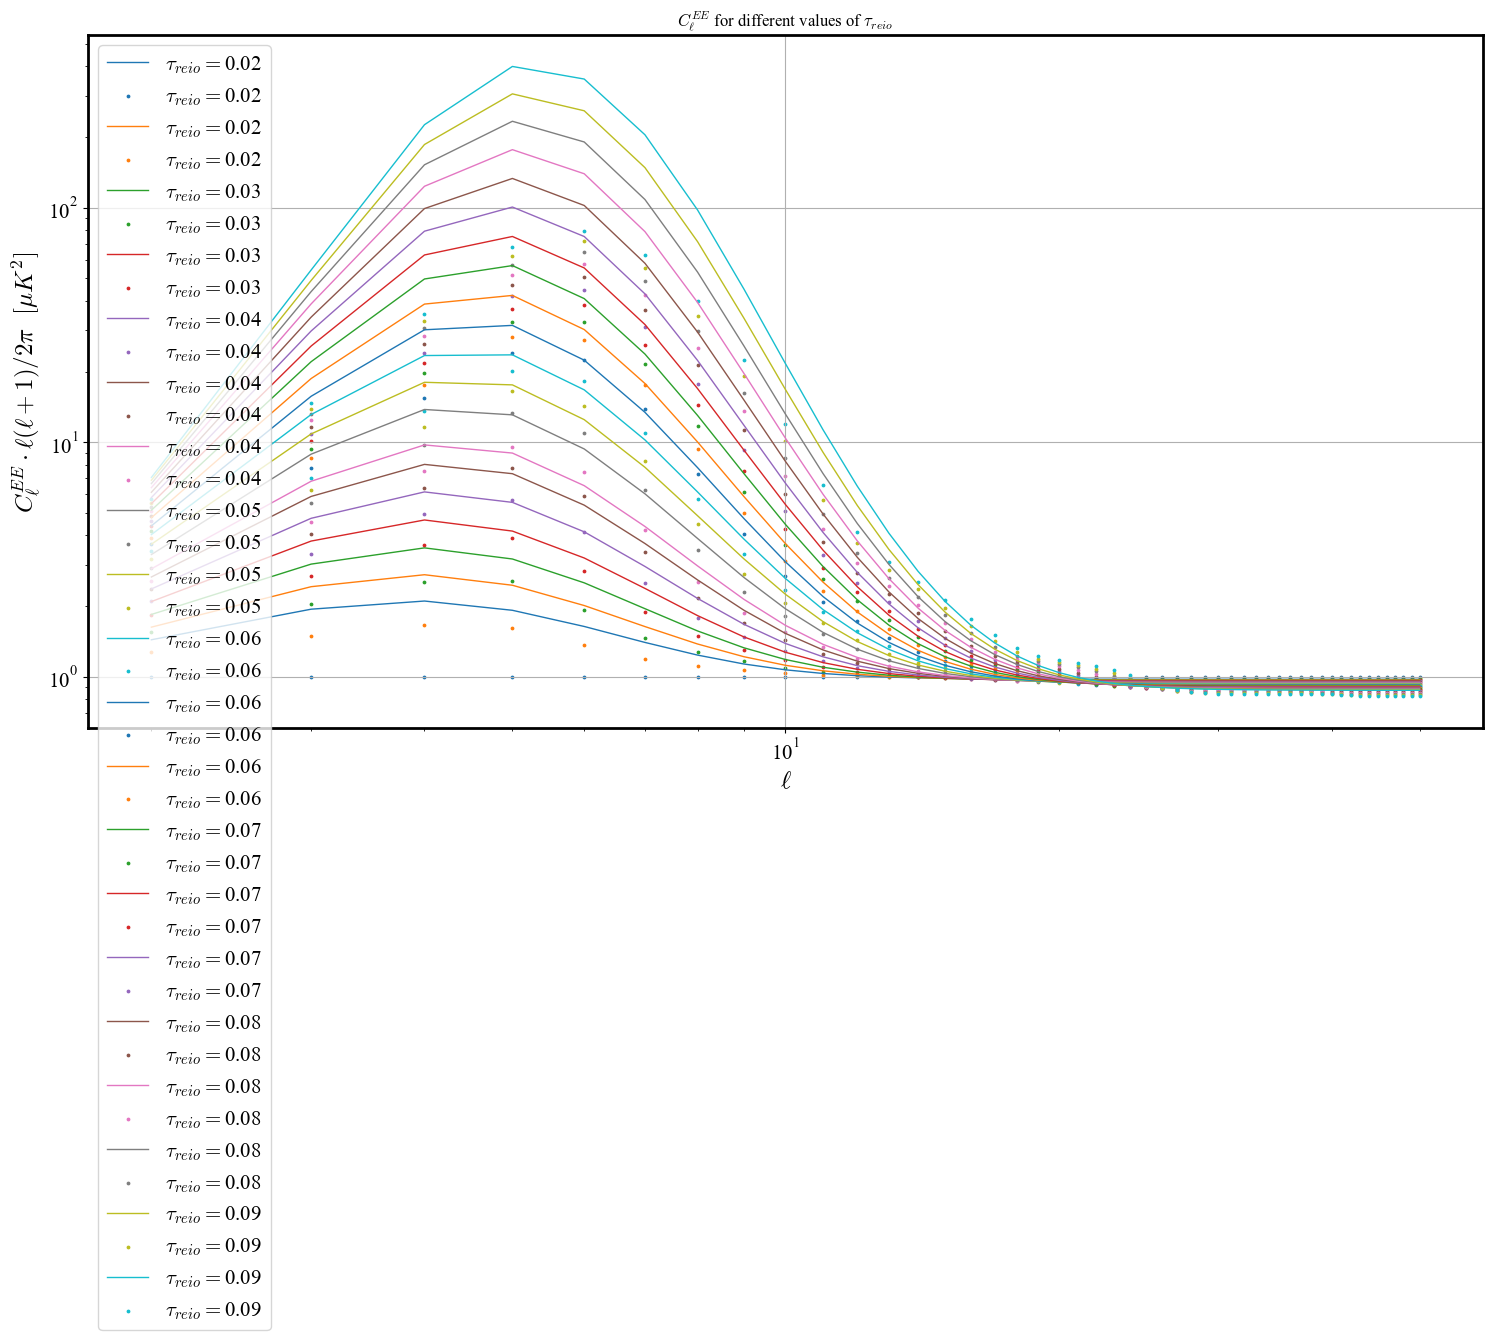

In [10]:
t_reio = np.round(np.linspace(0.0561-5*0.0071, 0.0561+5*0.0071, 20, endpoint=True),4)
tau = 0.0561
index = np.abs(t_reio - tau).argmin()
t_reio[index] = tau
x = pd.DataFrame({'ell': df['ell'], 'tau': df['tau']})
ee = df['EE'].values
tau = df['tau'].values
a = len(t_reio)
ell = df['ell'].values
b = len(ell)
alpha = int(b/a)
plt.figure(figsize=(18, 9))
ee_alpha = ee[0:alpha]
avg_acc = 0
avg_rmse = 0

plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.7,1.2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha)
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=3, label=string)
    plt.legend()  

    acc = accuracy(y,z)
    avg_acc += acc/20
    avg_rmse += rmse(y,z)/20
    print('tau_',i+1,' MAPE:',round(acc,2))

print('average MAPE is:', round(avg_acc,2), '%')
print('RMSE of the model is: ',round(avg_rmse,2))

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 

## REG separation variables

In [11]:
def h(ell,tau):
    f =np.exp(ell / (0.32 * (1.39**ell - ell) + 1.16) )- 0.124
    g = 8.05 * 10**4 * tau**2 * (tau - 0.0235) + 1.11
    pr = f * g
    return pr

norm_ga = []

for i in range (a):
    z = np.max((ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha]))*h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha])/np.max(h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha]))
    norm_ga.append(z)
F_ga = np.concatenate(norm_ga)

tau_ 1  MAPE: 90.97
tau_ 2  MAPE: 88.76
tau_ 3  MAPE: 86.54
tau_ 4  MAPE: 83.46
tau_ 5  MAPE: 79.77
tau_ 6  MAPE: 75.8
tau_ 7  MAPE: 72.65
tau_ 8  MAPE: 66.72
tau_ 9  MAPE: 61.94
tau_ 10  MAPE: 57.06
tau_ 11  MAPE: 52.13
tau_ 12  MAPE: 46.9
tau_ 13  MAPE: 41.48
tau_ 14  MAPE: 34.62
tau_ 15  MAPE: 27.37
tau_ 16  MAPE: 19.96
tau_ 17  MAPE: 12.42
tau_ 18  MAPE: 16.56
tau_ 19  MAPE: 23.66
tau_ 20  MAPE: 32.61
average MAPE is: 53.57 %
RMSE of the model is:  2.1


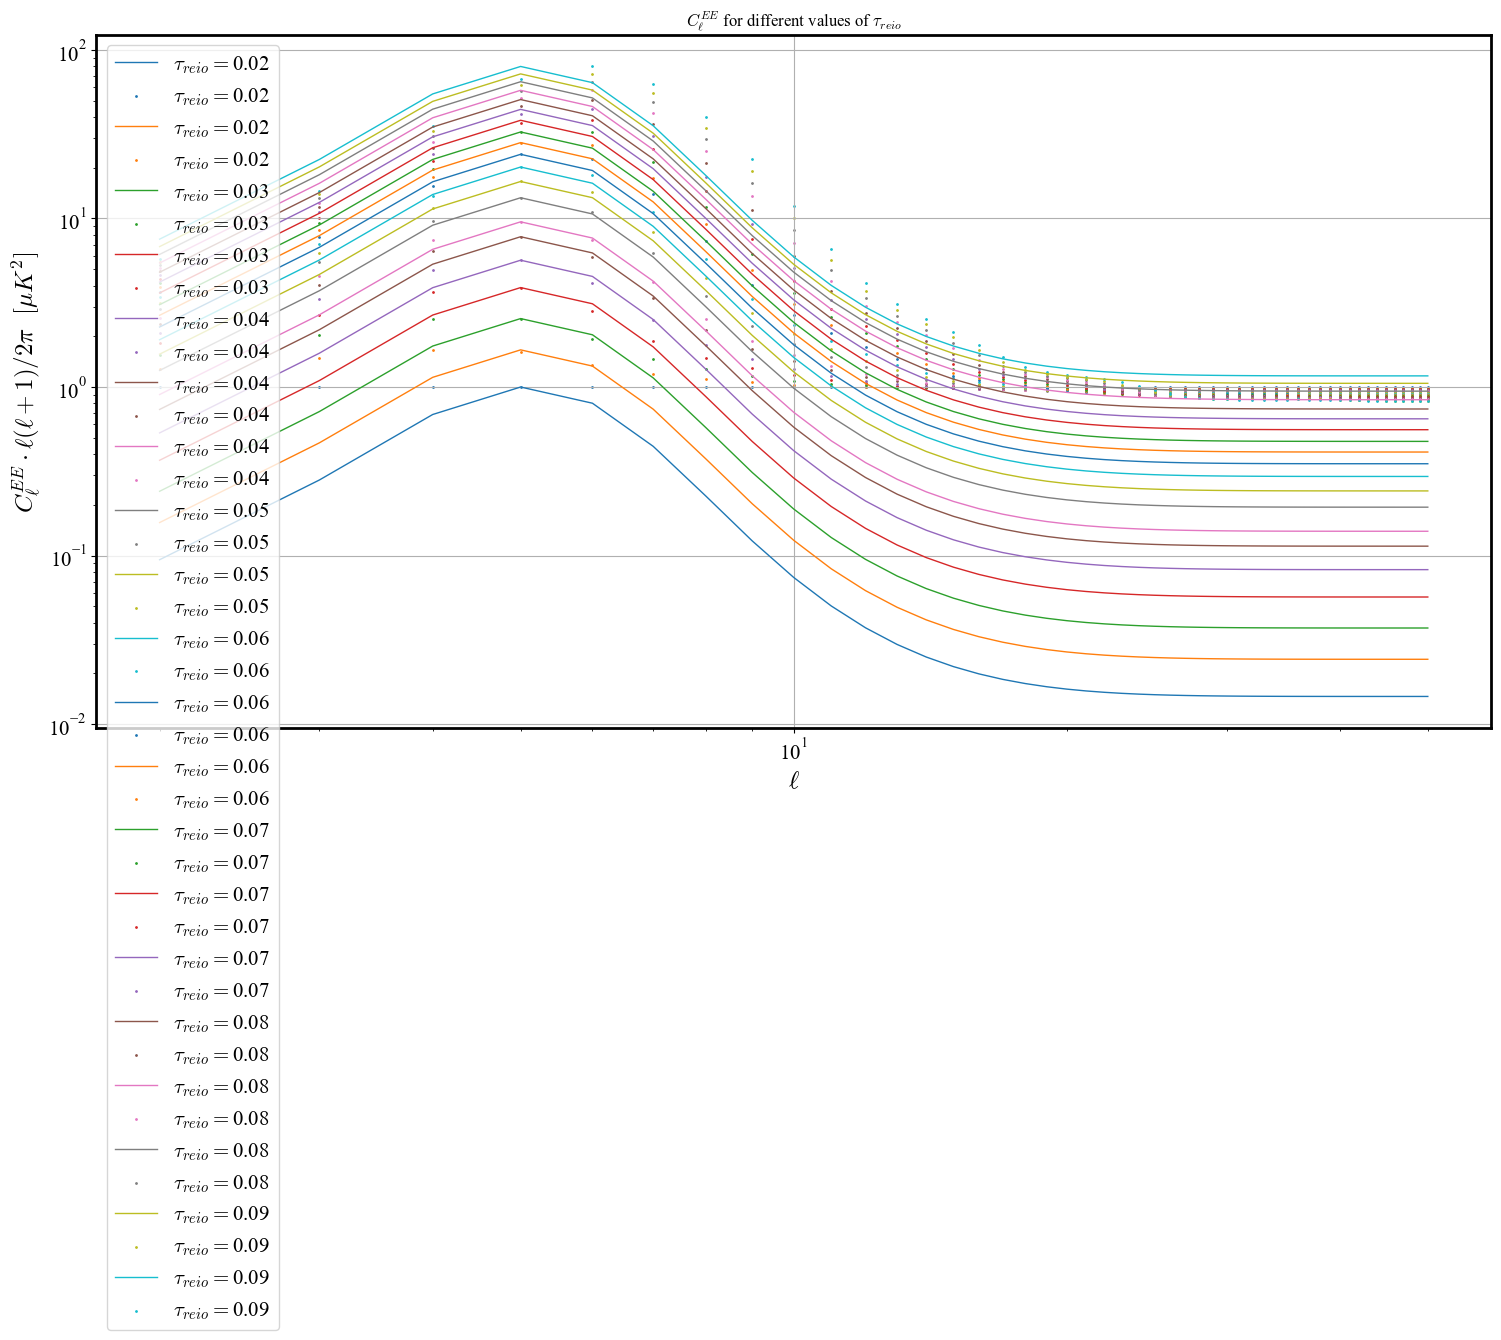

In [12]:
plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.3,1.2])
avg_rmse = 0
avg_acc = 0
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha)
    z = F_ga[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=1, label=string)
    plt.legend()  

    acc = accuracy(y,z)
    avg_acc += acc/20
    avg_rmse += rmse(y,z)/20
    print('tau_',i+1,' MAPE:',round(acc,2))

print('average MAPE is:', round(avg_acc,2), '%')
print('RMSE of the model is: ',round(avg_rmse,2))


plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 

In [13]:
df = pd.read_csv('CL_20_50_2.csv')
x = pd.DataFrame({'ell': df['ell'], 'tau': df['tau']})
ee = df['EE'].values
tau = df['tau'].values
ell = df['ell'].values
ee_alpha = ee[0:alpha]

ee_vec = []
ga_vec = []
ell1 = ell[0:alpha]
ee_alpha = ee[0:alpha]

for i in range(a):
    y = (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha)
    ee_vec.append(y)
    z = F_ga[i * alpha:(i + 1) * alpha]
    ga_vec.append(z)

In [14]:
import rcpresentation

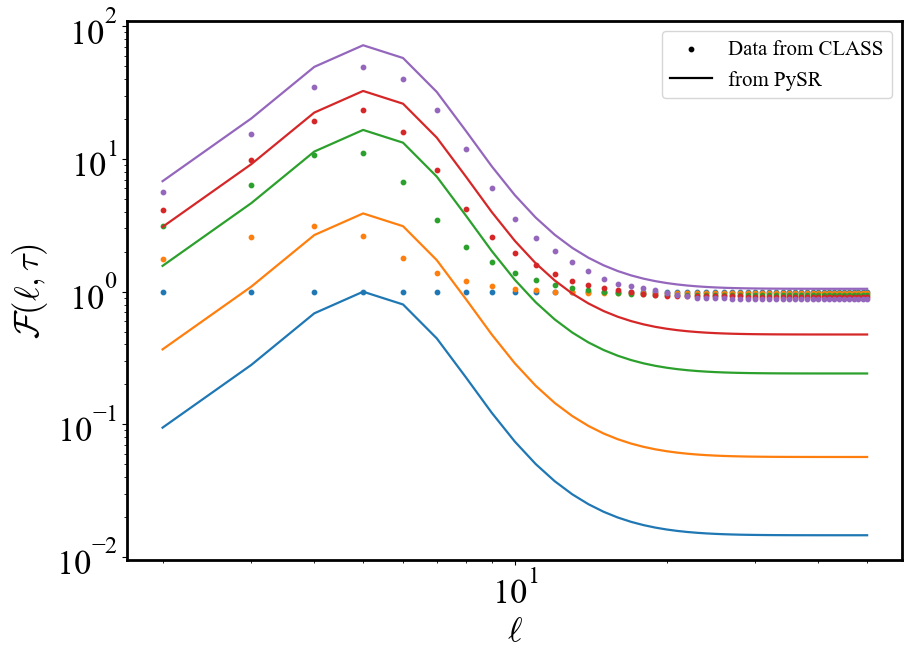

In [15]:
ind = len(ee_vec)
plt.rcParams['figure.figsize'] = (10, 7)  # Larghezza x Altezza 
plt.scatter(ell1,ee_vec[0]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[3]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[8]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[12]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[18]/ee_vec[0],s=10)

plt.loglog(ell1,ga_vec[0])
plt.loglog(ell1,ga_vec[3])
plt.loglog(ell1,ga_vec[8])
plt.loglog(ell1,ga_vec[12])
plt.loglog(ell1,ga_vec[18])

plt.scatter(0,0,label='Data from CLASS',s=10, color='k')
plt.axhline(0, label='from PySR', color='k')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{F}(\ell,\tau)$')
plt.legend()
save_img("CL_GA_Ratio_nopreproc")

## dividere tutto per $e^{-2\tau}$ 

planck not in the middle
1) hall_of_fame_2023-10-02_160505.349.pkl
$$ F(\ell, \tau) =  \cosh{\left(\tau e^{e^{\tan{\left(\sin{\left(\sinh{\left(\sin{\left(\log{\left(0.547 \ell + 0.547 e^{\cosh{\left(\cos{\left(\log{\left(\tau \right)} \right)} \right)}} \right)} \right)} \right)} \right)} \right)}}} \right)} $$
        average accuracy is: 93.97 % (graficamente più bello)
2) hall_of_fame_2023-10-02_194604.026.pkl
$$ F(\ell, \tau) = e^{\frac{\cosh{\left(9.42 \cdot 0.898^{\ell} \ell \tau \right)}}{\ell}}$$
        average accuracy is: 86.07 %
3) hall_of_fame_2023-10-02_194903.091.pkl
$$ F(\ell, \tau) = \cosh{\left(1.31 \ell \tanh{\left(\frac{0.763^{\ell}}{\tan{\left(\frac{0.0318}{\tau} \right)}} \right)} \right)} $$
        average accuracy is: 94.03 %
4) hall_of_fame_2023-10-02_230558.913.pkl
$$ F(\ell, \tau) = \cosh{\left(\frac{13.9 \ell \tau}{\cosh{\left(\log{\left(0.787^{\ell} \right)} \right)}} \right)} $$
        average accuracy is: 91.41 %
5) hall_of_fame_2023-10-02_231136.733.pkl
$$ F(\ell, \tau) = \cosh{\left(\ell \sinh{\left(\tanh{\left(\frac{0.756^{\ell}}{\tan{\left(\tan{\left(\frac{0.0223}{\tau} \right)} \right)}} \right)} \right)} \right)}$$
        average accuracy is: 94.43 %
6) hall_of_fame_2023-10-03_084102.715.pkl
$$ F(\ell, \tau) = \cosh{\left(\tau e^{1.40 e^{\sin{\left(\log{\left(\ell - \log{\left(\ell \right)} + \frac{0.110}{\tau} \right)} \right)}}} \right)}$$
        average accuracy is:  94.32 %

planck in the middle
1) hall_of_fame_2023-10-07_003226.163.pkl
# $$ F(\ell, \tau) = \cosh{\left(54.3^{- \sin{\left(2.77 \tau - \log{\left(\ell + 1.40 \right)} \right)}} \tau \right)}$$

In [28]:
df = pd.read_csv('CL_20_50_2.csv')
x = pd.DataFrame({'ell': df['ell'], 'tau': df['tau']})
ee = df['EE'].values
tau = df['tau'].values
ell = df['ell'].values
ee_alpha = ee[0:alpha]

beta = model.from_file('hall_of_fame_2023-10-07_003226.163.pkl')
print(beta.latex())

Checking if hall_of_fame_2023-10-07_003226.163.pkl exists...
Loading model from hall_of_fame_2023-10-07_003226.163.pkl
\cosh{\left(54.3^{- \sin{\left(2.77 \tau - \log{\left(\ell + 1.40 \right)} \right)}} \tau \right)}


In [29]:
ee_vec = []
ga_vec = []
ell1 = ell[0:alpha]
ee_alpha = ee[0:alpha]

for i in range(a):
    y = np.exp(-2*tau[0]) * (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha*np.exp(-2*tau[i * alpha:(i + 1) * alpha]))
    ee_vec.append(y)
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]
    ga_vec.append(z)

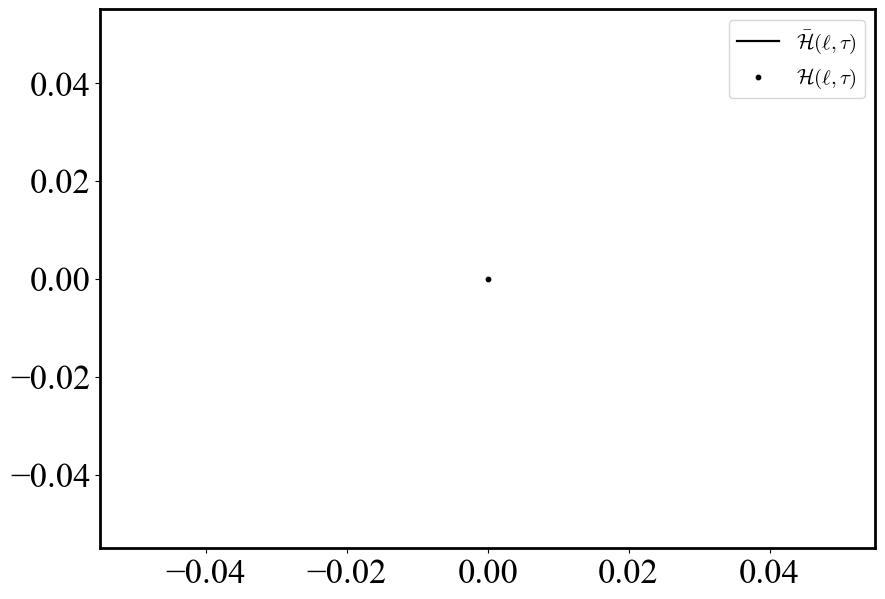

In [30]:
# Crea una legenda con solo due elementi rappresentativi
legend_elements = [
    plt.Line2D([0], [0], color='k', label=r'$\mathcal{\bar{H}}(\ell,\tau)$'),
    plt.scatter([0], [0], marker='o', s=10, color='k', label=r'$\mathcal{H}(\ell,\tau)$')
]

plt.legend(handles=legend_elements)

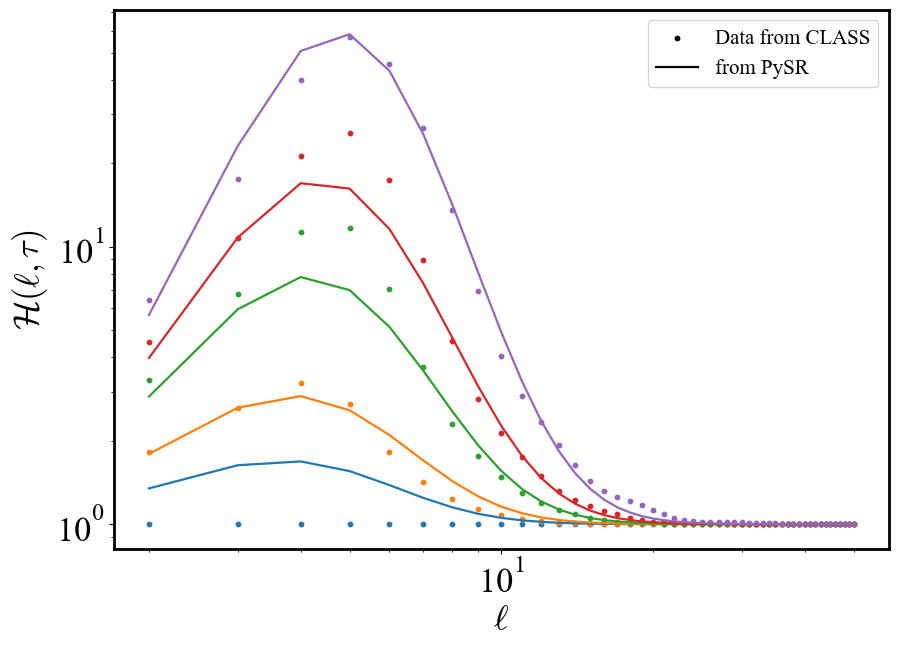

In [31]:
ind = len(ee_vec)
plt.rcParams['figure.figsize'] = (10, 7)  # Larghezza x Altezza 
plt.scatter(ell1,ee_vec[0]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[3]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[8]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[12]/ee_vec[0],s=10)
plt.scatter(ell1,ee_vec[18]/ee_vec[0],s=10)

plt.loglog(ell1,ga_vec[0])
plt.loglog(ell1,ga_vec[3])
plt.loglog(ell1,ga_vec[8])
plt.loglog(ell1,ga_vec[12])
plt.loglog(ell1,ga_vec[18])

plt.scatter(0,0,label='Data from CLASS',s=10, color='k')
plt.axhline(0, label='from PySR', color='k')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{H}(\ell,\tau)$')
plt.legend()
save_img('CL_GA_Ratio_plot')

tau_ 1  MAPE: 6.59
tau_ 2  MAPE: 4.33
tau_ 3  MAPE: 2.63
tau_ 4  MAPE: 2.04
tau_ 5  MAPE: 2.47
tau_ 6  MAPE: 2.84
tau_ 7  MAPE: 3.13
tau_ 8  MAPE: 3.22
tau_ 9  MAPE: 3.27
tau_ 10  MAPE: 3.41
tau_ 11  MAPE: 3.43
tau_ 12  MAPE: 3.43
tau_ 13  MAPE: 3.4
tau_ 14  MAPE: 3.49
tau_ 15  MAPE: 3.57
tau_ 16  MAPE: 3.59
tau_ 17  MAPE: 3.84
tau_ 18  MAPE: 4.1
tau_ 19  MAPE: 4.53
tau_ 20  MAPE: 5.58
average MAPE is: 3.64 %
RMSE of the model is:  0.06


<Figure size 1800x900 with 0 Axes>

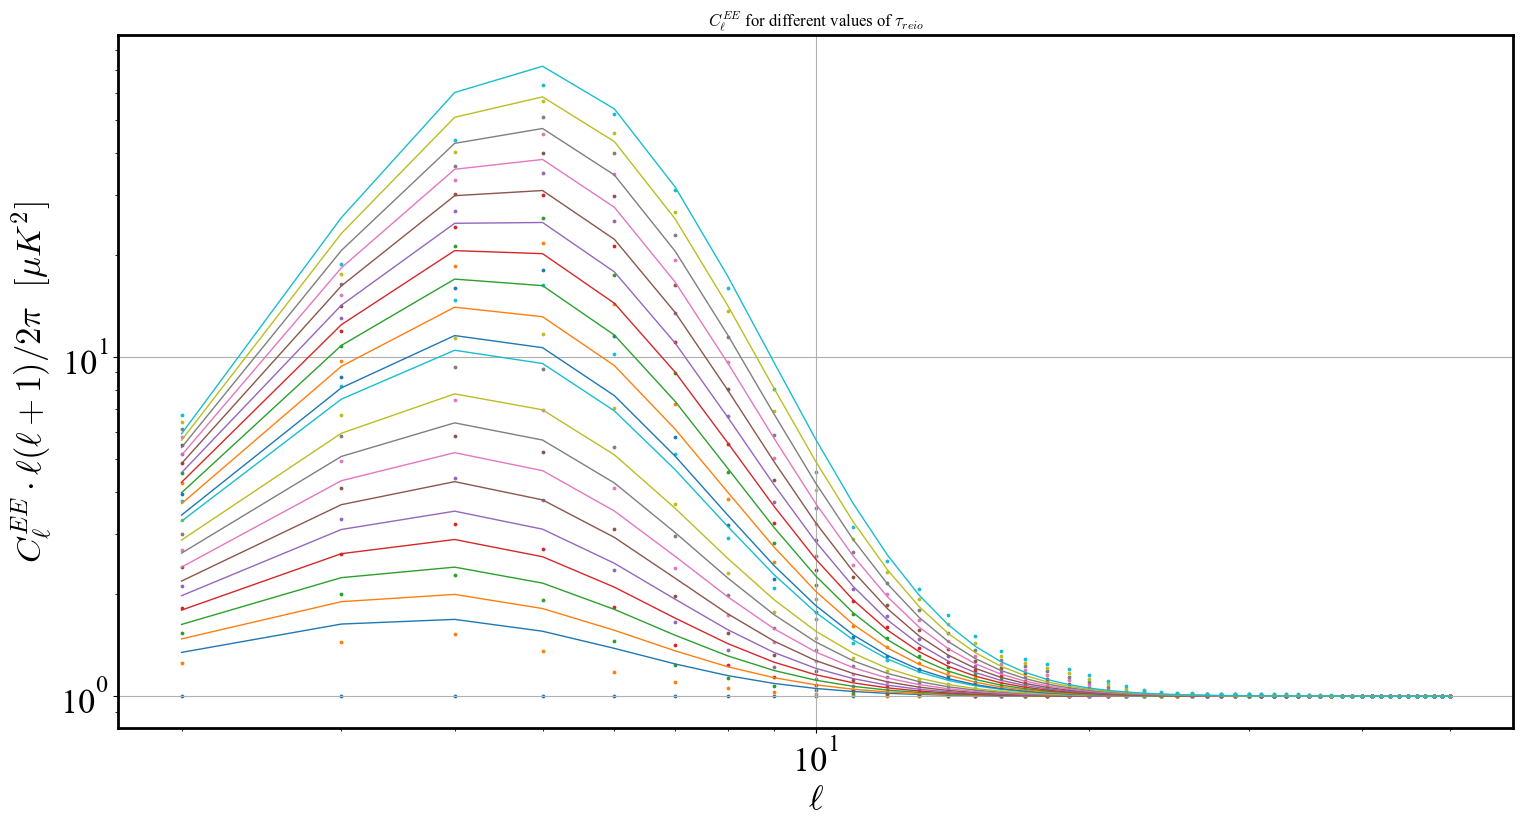

In [32]:
plt.figure(figsize=(18, 9))
ee_alpha = ee[0:alpha]
avg_acc = 0
avg_rmse = 0

plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.8,2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = np.exp(-2*tau[0]) * (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha*np.exp(-2*tau[i * alpha:(i + 1) * alpha]))
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=3, label=string)
    #plt.legend()  

    acc = accuracy(y,z)
    avg_acc += acc/20
    rm = rmse(y,z)/20
    avg_rmse += rm/20
    print('tau_',i+1,' MAPE:',round(acc,2))
    #print('tau_',i+1,' RMSE:',round(rm,2))

print('average MAPE is:', round(avg_acc,2), '%')
print('RMSE of the model is: ',round(avg_rmse,2))


plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 

In [33]:
def h(ell,tau):
    f = np.exp(1.63 * 0.672 ** ell * ell * (ell - 1.06)) + 3.04 / (ell - 1.07)
    g = tau * (5.97e4 * tau**2 - 76.1) + 1.97
    pr = f * g
    return pr
    
norm_ga = []

for i in range (a):
    z = np.max((ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha]))*h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha])/np.max(h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha]))
    norm_ga.append(z)
F_ga = np.concatenate(norm_ga)

tau_ 1  MAPE: 88.94
tau_ 2  MAPE: 87.42
tau_ 3  MAPE: 86.33
tau_ 4  MAPE: 85.68
tau_ 5  MAPE: 84.62
tau_ 6  MAPE: 83.44
tau_ 7  MAPE: 81.83
tau_ 8  MAPE: 80.19
tau_ 9  MAPE: 77.98
tau_ 10  MAPE: 74.15
tau_ 11  MAPE: 72.56
tau_ 12  MAPE: 69.3
tau_ 13  MAPE: 65.7
tau_ 14  MAPE: 61.62
tau_ 15  MAPE: 57.49
tau_ 16  MAPE: 52.88
tau_ 17  MAPE: 48.38
tau_ 18  MAPE: 43.61
tau_ 19  MAPE: 38.72
tau_ 20  MAPE: 33.83
average MAPE is: 72.38 %
RMSE of the model is:  2.17


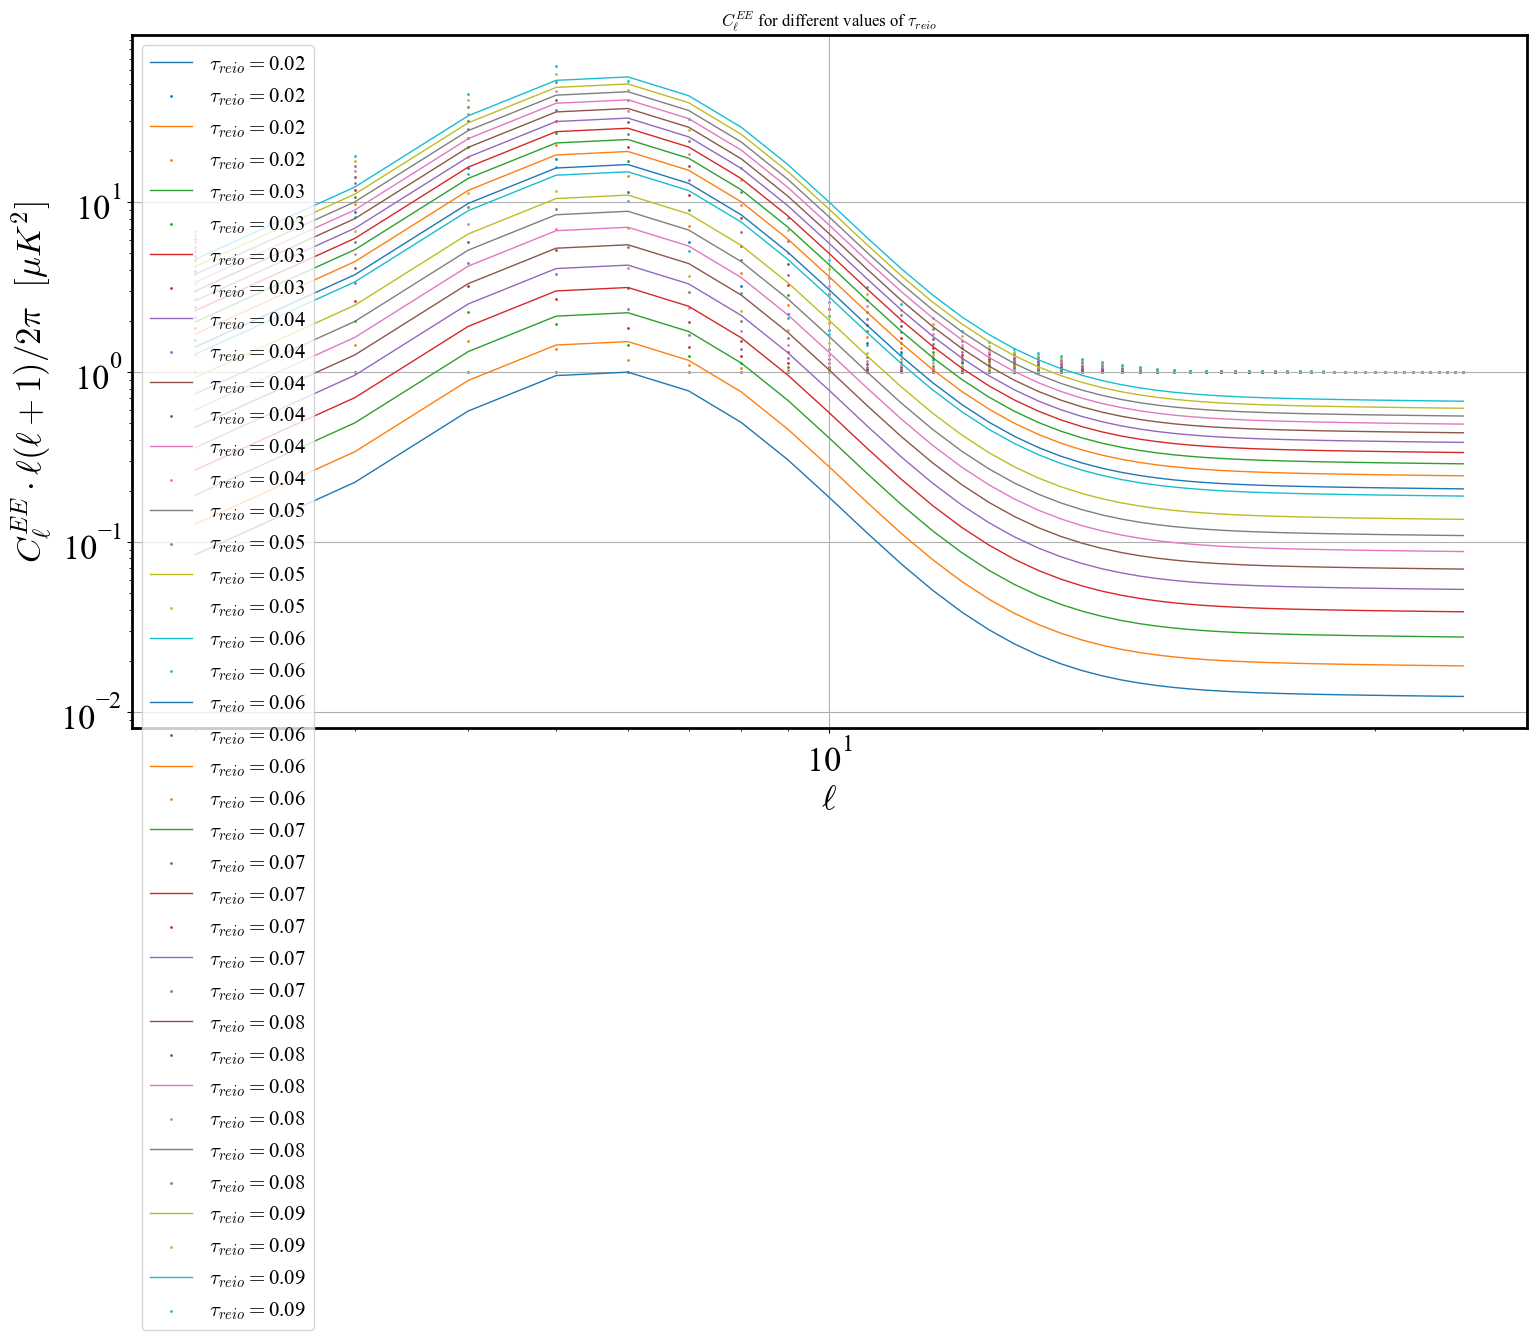

In [34]:
plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.3,1.2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = np.exp(-2*tau[0]) * (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha*np.exp(-2*tau[i * alpha:(i + 1) * alpha]))
    z = F_ga[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=1, label=string)
    plt.legend()  

    acc = accuracy(y,z)
    avg_acc += acc/20
    avg_rmse += rmse(y,z)/20
    print('tau_',i+1,' MAPE:',round(acc,2))

print('average MAPE is:', round(avg_acc,2), '%')
print('RMSE of the model is: ',round(avg_rmse,2))


plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 